# 3.1 线性回归

linear regression is based on the assumption that the relationship between the input variable $x$ and the output variable $y$ can be approximated by a linear function. It also assumes that the errors (the differences between the observed and predicted values) are (normally) distributed.

## Gaussian distribution

$$p(x; \mu; \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x-\mu)^2}{2\sigma^2})$$


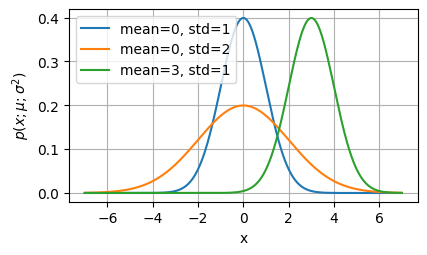

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def gaussian_normal(x, mu, sigma):
    p = 1.0 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-(x - mu)**2 / (2*sigma**2))

x = np.arange(-7, 7, 0.01)
params = [(0, 1), (0, 2), (3, 1)]

plt.figure(figsize=(4.5, 2.5))
for mu, sigma in params:
    y = gaussian_normal(x, mu, sigma)
    plt.plot(x, y,  label=f'mean={mu}, std={sigma}')
    
plt.xlabel('x')
plt.ylabel(r'$p(x; \mu; \sigma^2)$')
plt.legend()
plt.grid(True)
plt.show()

> Notes: we basically could see that if we change the mean value $\mu$, the whole distribution will shift left or right; if we change the variance $\sigma^2$, the distribution will become wider or narrower. And the height of the peak will also drop or rise accordingly.

### Likelihood function

Assume that $y=w^Tx + b + \epsilon$, where $\epsilon \sim N(0, \sigma^2)$

Then, the likelihood function is (given $x$ and parameters $w,b,\sigma^2$):   
$$p(y|x; w, b,\sigma^2) = p(\epsilon; 0, \sigma^2) =  \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(y-w^Tx - b)^2}{2\sigma^2})$$

#### 1. Understading the noise distribution
We assume that the noise $\epsilon$ follows a Gaussian distribution with mean 0 and variance $\sigma^2$. Then we can derive the density function as:
$$p(\epsilon; 0, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{\epsilon^2}{2\sigma^2})$$
Since $y = w^Tx + b + \epsilon$, we can express $\epsilon$ as $\epsilon = y - (w^Tx + b)$. From this Eq., we know that: Given $x$, $w$, and $b$, the randomness of $y$ stems solely from $\epsilon$. In other words, the probability of $y$ assuming a specific value is equivalent to the probability of $\epsilon$ taking the corresponding error value. Thus, substituting this into the density function, we get:
$$p(y|x;w,b, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(y - w^Tx - b)^2}{2\sigma^2})$$


### Maximum Likelihood Estimation
Given a dataset with $m$ samples $\{(x^{(i)}, y^{(i)})\}_{i=1}^n$, we can write the likelihood function as:
$$p(\boldsymbol{y}|\boldsymbol{X}) = \prod_{i=1}^n p(y^{(i)}|x^{(i)})$$
Taking the (negative) logarithm of the likelihood function, we obtain the log-likelihood function:
$$ -\log p(\boldsymbol{y}|\boldsymbol{X}) = \sum_{i=1}^n \frac{1}{2} \log(2\pi \sigma^2) + \frac{1}{2\sigma^2}(y^{(i)} - w^T x^{(i)} - b)^2$$

### Derivation of Negative Log-Likelihood

\begin{aligned}
% 1. Start with the Likelihood definition
p(\mathbf{y}|\mathbf{X}) &= \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( - \frac{(y^{(i)} - w^T x^{(i)} - b)^2}{2\sigma^2} \right) \\
% 2. Take the log
\log p(\mathbf{y}|\mathbf{X}) &= \sum_{i=1}^n \left[ \log\left( (2\pi\sigma^2)^{-\frac{1}{2}} \right) + \log\left( \exp\left( - \frac{(y^{(i)} - w^T x^{(i)} - b)^2}{2\sigma^2} \right) \right) \right] \\
% 3. Simplify log terms
&= \sum_{i=1}^n \left[ -\frac{1}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}(y^{(i)} - w^T x^{(i)} - b)^2 \right] \\
% 4. Negative Log Likelihood (Final Result)
-\log p(\mathbf{y}|\mathbf{X}) &= \sum_{i=1}^n \left[ \frac{1}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2}(y^{(i)} - w^T x^{(i)} - b)^2 \right]
\end{aligned}

> Notes: In the assumption of Gaussian noise, maximizing the likelihood function is equivalent to minimizing the sum of squared errors (SSE) between the predicted and actual values. This is because the negative log-likelihood function derived from the Gaussian assumption includes a term proportional to the SSE. Therefore, minimizing the negative log-likelihood effectively minimizes the SSE, leading to the same optimal parameters for the linear regression model.